<a href="https://colab.research.google.com/github/indahnr/Deep_Learning/blob/main/week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LeNet

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [ ]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [ ]:
x_val = x_train[-2000:,:,:,:] 
y_val = y_train[-2000:] 
x_train = x_train[:-2000,:,:,:] 
y_train = y_train[:-2000]

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_2 (Activation)   (None, 14, 14, 6)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_3 (Activation)   (None, 5, 5, 16)         

In [ ]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 45s 49ms/step - loss: 1.0969 - accuracy: 0.6139 - val_loss: 0.2901 - val_accuracy: 0.9150
Epoch 2/40
907/907 [==============================] - 35s 39ms/step - loss: 0.3323 - accuracy: 0.8950 - val_loss: 0.1813 - val_accuracy: 0.9450
Epoch 3/40
907/907 [==============================] - 35s 39ms/step - loss: 0.2537 - accuracy: 0.9195 - val_loss: 0.1295 - val_accuracy: 0.9650
Epoch 4/40
907/907 [==============================] - 37s 41ms/step - loss: 0.2103 - accuracy: 0.9339 - val_loss: 0.1299 - val_accuracy: 0.9660
Epoch 5/40
907/907 [==============================] - 35s 39ms/step - loss: 0.1752 - accuracy: 0.9431 - val_loss: 0.1181 - val_accuracy: 0.9695
Epoch 6/40
907/907 [==============================] - 35s 39ms/step - loss: 0.1540 - accuracy: 0.9506 - val_loss: 0.1012 - val_accuracy: 0.9725
Epoch 7/40
907/907 [==============================] - 35s 38ms/step - loss: 0.1373 - accuracy: 0.9567 - val_loss: 0.1178 - val_accuracy:

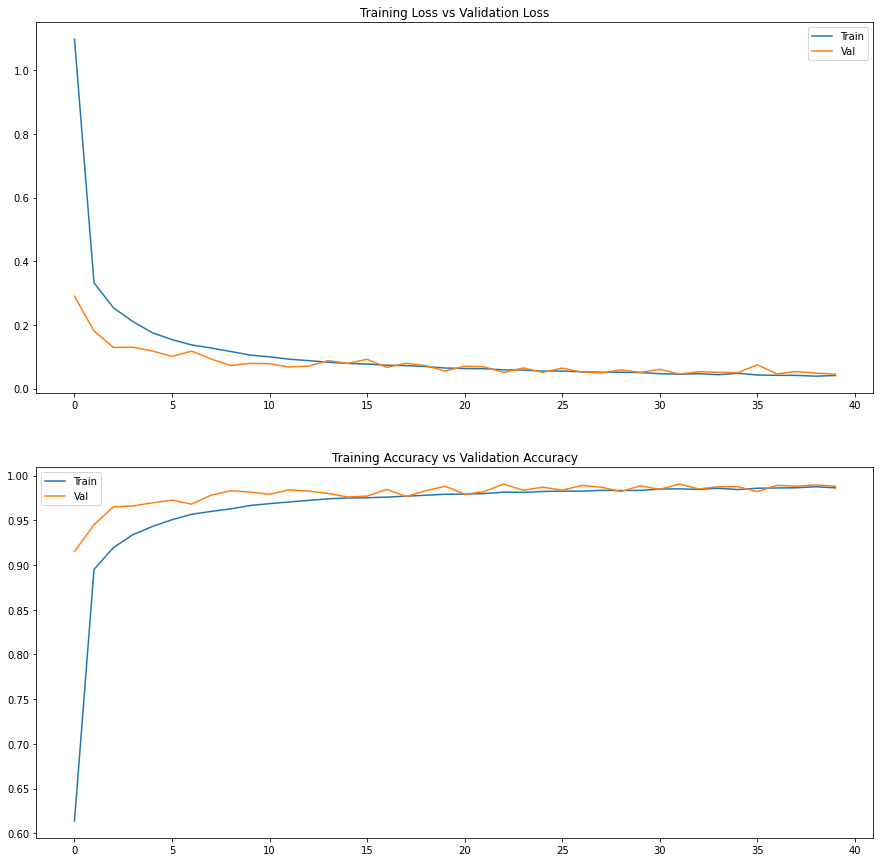

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Training Loss vs Validation Loss') 
axs[0].legend(['Train', 'Val']) 

axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy']) 
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].legend(['Train', 'Val'])

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0535 - accuracy: 0.9829


[0.05353131145238876, 0.9829000234603882]